In [1]:
from lineagegrn.plot.analysis_result import *
from lineagegrn.downstream_analysis import *
from lineagegrn.utils.constant import *
from lineagegrn.utils.synthetic_data_generation import *
from lineagegrn.cell_fate_map import *
from lineagegrn.gene_regulatory_network import*
from lineagegrn.utils.metrics import *

In [2]:
fate_map_path = 'examples/data/simulation/additional_input_data/grn_dict.csv'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
newick_format = generate_newick(fate_map)

In [3]:
grns_path = 'examples/results/simulation/additional_output/ground_truth_grn'
grn0 = generate_root_grn(150, 100, grns_path)
decendent_grns = generate_descendant_grns(7, 150, 100, edge_dict, grns_path, grn0)

In [4]:
atac_file_path = 'examples/data/simulation/input/atac_data.csv'
#atac_data = generate_atac_data(decendent_grns, 7, 150, 100, atac_file_path)

In [5]:
sergio_files_path = 'examples/results/simulation/additional_output/sergio_files'
expr_matrix_path = 'examples/results/simulation/additional_output/expression_files'
generate_expression_data(decendent_grns, 7, 150, 100, 300, sergio_files_path, expr_matrix_path, 1)

Start simulating new level
There are 100 genes to simulate in this layer
Done with current level
Start simulating new level
There are 150 genes to simulate in this layer
Done with current level
Start simulating new level
There are 100 genes to simulate in this layer
Done with current level
Start simulating new level
There are 150 genes to simulate in this layer
Done with current level
Start simulating new level
There are 100 genes to simulate in this layer
Done with current level
Start simulating new level
There are 150 genes to simulate in this layer
Done with current level
Start simulating new level
There are 100 genes to simulate in this layer
Done with current level
Start simulating new level
There are 150 genes to simulate in this layer
Done with current level


In [6]:
expression_file_path = 'examples/data/simulation/input/expression_data.csv'

target_genes_name = pd.read_csv('examples/data/simulation/additional_input_data/target_genes_name.csv')['x'].tolist()
regulatory_genes_name = pd.read_csv('examples/data/simulation/additional_input_data/regulatory_genes_name.csv')['x'].tolist()
#convert_expression_file(150, target_genes_name, regulatory_genes_name, expr_matrix_path, expression_file_path)

In [7]:
saved_dir = 'examples/results/simulation/inferred_grns/inferred_grn_defult_params'

#grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
#grn_inference_result.infer_grn(20)

dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [8]:
nodes=list(fate_map.nodes.keys())
auroc_list=[]
auprc_list=[]

for node_id in nodes:
    grn_infer=dynamic_networks_dict[node_id]
    grn_true=pd.read_csv('examples/results/simulation/additional_output/ground_truth_grn/'+node_id+'.csv')
    grn_true=grn_true.T
    auroc=compute_auroc(grn_infer,grn_true,0.1)
    auprc=compute_auprc(grn_infer,grn_true,0.1)
    print([node_id,auroc,auprc])
    auroc_list.append([node_id,auroc])
    auprc_list.append([node_id,auprc])
    
auroc_df=pd.DataFrame(auroc_list)
auroc_df.columns=['node_id','value']
auprc_df=pd.DataFrame(auprc_list)
auprc_df.columns=['node_id','value']
#auprc_df.to_csv('examples/results/simulation/evaluation_result/auprc.csv',index=None)
#auroc_df.to_csv('examples/results/simulation/evaluation_result/auroc.csv',index=None)

['grn0', 0.49842993851112977, 0.5988890280037846]
['grn1', 0.5059629899388272, 0.5780475356979433]
['grn2', 0.5027379204407443, 0.5819486768731923]
['grn3', 0.5040988809849393, 0.5467650670223894]
['grn4', 0.4999398700288936, 0.5369629569822686]
['grn5', 0.5004745418865881, 0.5493463235023684]
['grn6', 0.499308644402157, 0.5448635104778409]


In [9]:
saved_dir_pert005 = 'examples/results/simulation/inferred_grns/inferred_grn_pert005'
fate_map_pert005 = perturb_branch_lengths(newick_format, sigma=0.05, seed=1234)

grn_inference_result_pert005 = GRNInference(atac_file_path, expression_file_path, fate_map_pert005, saved_dir_pert005)
grn_inference_result_pert005.infer_grn(20)
grn_dict_pert005 = get_dynamic_networks(saved_dir_pert005, fate_map_pert005, 0.1, regulatory_genes_name, target_genes_name)

((grn3:0.5795122297119847,grn4:0.5794517525168386)grn1:0.4205180088855884,(grn5:0.9069813250729323,grn6:0.8930994994339567)grn2:0.09995958774655547)grn0:0.0grn0:0;


-2025-06-27 23:02:56,445-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:02:57,034-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:02:57,921-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:02:58,508-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:02:59,397-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:03:00,022-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:03:01,002-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:03:01,593-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

In [10]:
saved_dir_pert01 = 'examples/results/simulation/inferred_grns/inferred_grn_pert01'
fate_map_pert01 = perturb_branch_lengths(newick_format, sigma=0.1, seed=1234)
grn_inference_result_pert01 = GRNInference(atac_file_path, expression_file_path, fate_map_pert01, saved_dir_pert01)
grn_inference_result_pert01.infer_grn(20)
grn_dict_pert01 = get_dynamic_networks(saved_dir_pert01, fate_map_pert01, 0.1, regulatory_genes_name, target_genes_name)

saved_dir_pert03 = 'examples/results/simulation/inferred_grns/inferred_grn_pert03'
fate_map_pert03 = perturb_branch_lengths(newick_format, sigma=0.3, seed=1234)
grn_inference_result_pert03 = GRNInference(atac_file_path, expression_file_path, fate_map_pert03, saved_dir_pert03)
grn_inference_result_pert03.infer_grn(20)
grn_dict_pert03 = get_dynamic_networks(saved_dir_pert03, fate_map_pert03, 0.1, regulatory_genes_name, target_genes_name)

((grn3:0.5578869448950208,grn4:0.5596662207613683)grn1:0.44122341717180547,(grn5:0.9134898768992463,grn6:0.8858458076854977)grn2:0.10033215770762802)grn0:0.0grn0:0;


-2025-06-27 23:07:19,214-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:07:19,796-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:07:20,731-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:07:21,328-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:07:22,204-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:07:22,799-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:07:23,693-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:07:24,282-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

((grn3:0.457879285460245,grn4:0.48736062347820786)grn1:0.5273800455307736,(grn5:0.9356422638015541,grn6:0.8526949556472775)grn2:0.10583139027558425)grn0:0.0grn0:0;


-2025-06-27 23:11:40,012-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:11:40,603-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:11:41,501-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:11:42,085-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:11:42,975-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:11:43,579-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:11:44,460-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:11:45,044-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

In [11]:
saved_dir_pert05 = 'examples/results/simulation/inferred_grns/inferred_grn_pert05'
fate_map_pert05 = perturb_branch_lengths(newick_format, sigma=0.5, seed=1234)
grn_inference_result_pert05 = GRNInference(atac_file_path, expression_file_path, fate_map_pert05, saved_dir_pert05)
grn_inference_result_pert05.infer_grn(20)
grn_dict_pert05 = get_dynamic_networks(saved_dir_pert05, fate_map_pert05, 0.1, regulatory_genes_name, target_genes_name)

saved_dir_pert07 = 'examples/results/simulation/inferred_grns/inferred_grn_pert07'
fate_map_pert07 = perturb_branch_lengths(newick_format, sigma=0.7, seed=1234)
grn_inference_result_pert07 = GRNInference(atac_file_path, expression_file_path,fate_map_pert07, saved_dir_pert07)
grn_inference_result_pert07.infer_grn(20)
grn_dict_pert07 = get_dynamic_networks(saved_dir_pert07, fate_map_pert07, 0.1, regulatory_genes_name, target_genes_name)

((grn3:0.32932043514338305,grn4:0.4244026016463954)grn1:0.6231384816051108,(grn5:0.9530730265396138,grn6:0.8110097360822173)grn2:0.1179586186890845)grn0:0.0grn0:0;


-2025-06-27 23:16:03,310-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:16:03,901-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:16:04,897-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:16:05,484-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:16:06,374-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:16:06,962-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:16:07,846-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:16:08,435-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

((grn3:0.15794786841761072,grn4:0.36908954683105005)grn1:0.7364812923756696,(grn5:0.9671463527147193,grn6:0.7570076258500661)grn2:0.13792301071760735)grn0:0.0grn0:0;


-2025-06-27 23:20:31,290-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:20:31,899-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:20:32,785-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:20:33,369-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:20:34,262-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:20:34,841-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:20:35,723-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:20:36,316-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

In [12]:
newick_format_pert_topology = '(((grn3:0.6,grn4:0.6)grn1:0.4,grn5:0.9)grn2:0.1,grn6:1.0)grn0:0;'
saved_dir_pert_topology = 'examples/results/simulation/inferred_grns/inferred_grn_pert_topology'

edge_dict_pert_topology = newick_to_edge_length_dict(newick_format_pert_topology)
edge_pert_topology = parse_edge_dict(edge_dict_pert_topology)
fate_map_pert_topology = FateMap(edge_pert_topology)

grn_inference_result_pert_str = GRNInference(atac_file_path, expression_file_path, fate_map_pert_topology, saved_dir_pert_topology)
grn_inference_result_pert_str.infer_grn(20)
grn_dict_pert_topology = get_dynamic_networks(saved_dir_pert_topology, fate_map_pert_topology, 0.1, regulatory_genes_name, target_genes_name)

-2025-06-27 23:24:50,365-INFO-28204 Serialize node_id grn3 expression data of regulator_gene
-2025-06-27 23:24:50,969-INFO-28204 Serialize node_id grn3 expression data of target_gene
-2025-06-27 23:24:51,853-INFO-28204 Serialize node_id grn4 expression data of regulator_gene
-2025-06-27 23:24:52,434-INFO-28204 Serialize node_id grn4 expression data of target_gene
-2025-06-27 23:24:53,486-INFO-28204 Serialize node_id grn5 expression data of regulator_gene
-2025-06-27 23:24:54,187-INFO-28204 Serialize node_id grn5 expression data of target_gene
-2025-06-27 23:24:55,246-INFO-28204 Serialize node_id grn6 expression data of regulator_gene
-2025-06-27 23:24:55,878-INFO-28204 Serialize node_id grn6 expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\Lineage

In [16]:
jaccard_means = []
overlap_means = []
grn_pert = [grn_dict_pert005, grn_dict_pert01, grn_dict_pert03, grn_dict_pert05, grn_dict_pert07, grn_dict_pert_topology]
for id in range(len(grn_pert)):
    jaccard_means.append(metric_perturbation_impact(grn_pert[id], dynamic_networks_dict)[0])
    overlap_means.append(metric_perturbation_impact(grn_pert[id], dynamic_networks_dict)[1])

print(jaccard_means)
print(overlap_means)

[0.9928021771748436, 0.9306423926821185, 0.9301414871605946, 0.9299776335481349, 0.9281831137652954, 0.8616158941999136]
[0.9714285714285714, 0.880952380952381, 0.880952380952381, 0.8857142857142858, 0.8857142857142858, 0.8238095238095238]


-2025-06-28 09:49:07,703-WARNING-28204 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


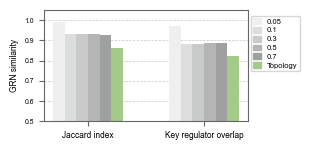

In [17]:
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches

perturbation_labels = ["0.05", "0.1", "0.3", "0.5", "0.7", "Topology"]
colors = ['#EFEFEF', '#DCDDDD', '#C9CACA', '#B5B5B6', '#9FA0A0', '#A3CA89']
metric_labels = ["Jaccard index", "Key regulator overlap"]

x = np.arange(len(metric_labels)) 
bar_width = 0.1
fig, ax = plt.subplots(figsize=(3.2, 1.6))

for i, (jac, over, color, label) in enumerate(zip(jaccard_means, overlap_means, colors, perturbation_labels)):
    ax.bar(x[0] + i * bar_width - 0.25, jac, width=bar_width, color=color)
    ax.bar(x[1] + i * bar_width - 0.25, over, width=bar_width, color=color)

ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=6, fontname='Arial')

ax.set_ylabel("GRN similarity", fontsize=6, fontname='Arial')
ax.set_ylim(0.5, 1.05)
ax.tick_params(axis='y', labelsize=5)
for label in ax.get_yticklabels():
    label.set_fontname('Arial')

legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in zip(colors, perturbation_labels)]
legend_font = FontProperties(family='Arial', size=5.5)
ax.legend(
    handles=legend_handles,
    loc='center left',
    bbox_to_anchor=(1.0, 0.7),
    prop=legend_font,
    markerscale=0.8,
    handlelength=1.0,
    handleheight=0.8,
    labelspacing=0.3,
    borderpad=0.3,
    borderaxespad=0.4
)

ax.set_axisbelow(True)
ax.grid(True, axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#666666')
ax.tick_params(axis='x', color='#666666')
ax.tick_params(axis='y', color='#666666')

output_path = 'examples/results/simulation/additional_output/figures'
filename = "pert_grouped.eps"
os.makedirs(output_path, exist_ok=True)
save_path = os.path.join(output_path, filename)
plt.tight_layout()
plt.savefig(save_path, format='eps', bbox_inches='tight')
plt.show()